In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("FS_2y_before_Bankruptcy_train.csv")
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.024558,0.30051,0.10733,1.8368,34.382,-0.026711,-0.020067,2.2519,1.06670,0.67673,...,0.062497,-0.036289,0.9375,0.25454,13.632,3.693,69.389,5.2602,0.8826,0
1,0.639180,0.00000,1.00000,?,29.678,-1.139300,0.760520,?,1.11850,1.00000,...,0.67983,0.63918,0.32014,0.0,?,37.886,0,?,?,0
2,-0.440760,0.47723,0.19260,1.4678,34.555,0.000000,-0.440760,1.0954,1.51860,0.52277,...,-0.29059,-0.84313,1.2871,0.12538,?,2.5649,98.95,3.6887,3.8376,0
3,0.119520,0.17679,0.63546,4.5944,117.65,0.251540,0.148750,4.5826,1.12630,0.81017,...,0.11211,0.14752,0.88789,0.0,8.9302,10.287,40.355,9.0448,8.5169,0
4,0.230400,0.27095,0.23762,2.5745,-26.928,0.617540,0.282690,2.6907,0.80411,0.72905,...,0.45957,0.31602,0.6232,0.16465,7.9274,6.6605,68.502,5.3283,1.315,0


In [26]:
data.shape

(6855, 65)

In [34]:
np.sum(data["class"]==1)

361

파산한 기업은 6855개 중 361개 밖에 없다

In [3]:
data.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

In [16]:
np.sum((data.isna().sum()!=0))

0

Nan 값은 하나도 없다

?가 보이니 ? 개수를 세어봤더니 ? 값은 엄청 많다..

In [25]:
np.sum(data == "?").sort_values()[-15:]

Attr33      28
Attr47      57
Attr52      60
Attr32      72
Attr21     112
Attr41     142
Attr24     149
Attr53     162
Attr54     162
Attr28     162
Attr64     162
Attr45     418
Attr60     420
Attr27     462
Attr37    3100
dtype: int64

Attr37은 6855개 중에 3100개가 ?값인데 과연 이걸 쓸 수 있을까..? (X37 (current assets - inventories) / long-term liabilities)

In [17]:
np.sum(np.sum(data == "?"))

6132

총 6132개나 있다

In [19]:
np.sum(data == "?", axis = 1).value_counts()

0     3334
1     2577
2      413
3      223
4       85
5       78
6       41
7       39
8       15
9        9
14       7
10       6
18       4
17       4
11       4
15       3
13       3
16       2
12       2
21       2
20       1
25       1
22       1
19       1
dtype: int64

- 행별로 ? 가 있는 것끼리 상관관계를 봤더니 아예 ?가 없는 행은 3334개밖에없다.
- 그러므로 그냥 ? 있는 행을 지워서는 안 된다..
- ?가 많은 행도 있지만 딱히 엄청 상관관계가 있어 보이진 않는다.
- ?가 많은 행의 target 변수들을 비교한 후 상관관계를 보고 ?가 너무 많은 행은 그냥 없애도 되지않을까.. 숫자도 적고,, (변수가 총 64개인데 Nan 값이 25개라니,,)
- 계산 식들이니까 혹시 다른 변수들을 이용해 ? 값을 구할 방법은 없을까?

In [30]:
many_nan_data = data[np.sum(data == "?", axis = 1)>=15]
many_nan_data.head()

C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
1,0.639180,0.000000,1.000000,?,29.678,-1.139300,0.760520,?,1.11850,1.00000,...,0.67983,0.63918,0.32014,0.0,?,37.886,0,?,?,0
141,-0.154180,0.001647,0.165690,101.6,1628.3,0.408540,-0.154180,606.19,0.00000,0.99835,...,?,-0.15442999999999998,?,0.0,?,0,?,0,0,0
633,-0.004334,0.562210,-0.018071,0.87135,84531,-0.005906,-0.004510,0.77871,0.00000,0.43779,...,?,0.0,0.17714,0.9633200000000001,0,0,?,0,0,0
880,0.000000,0.107350,-0.016672,0.47952,-217.74,0.024983,0.027346,8.3156,0.00000,0.89265,...,?,0.0,?,0.084372,?,0,?,0,0,0
1580,0.036402,0.000000,1.000000,?,0,0.072750,0.044946,?,0.07501,1.00000,...,-2.8239,0.036402,0.86456,0.0,0.11475,?,0,?,?,0


In [32]:
many_nan_data.shape

(19, 65)

In [35]:
np.sum(many_nan_data["class"])

1

19개 밖에 하나밖에 없는 걸 보니 ?의 개수가 그렇게 유의미하진 않은 것 같다.

In [36]:
np.sum(many_nan_data== "?").sort_values()[-15:]

C:\Users\MINJU\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Attr62    12
Attr19    12
Attr20    12
Attr56    12
Attr13    12
Attr42    12
Attr43    12
Attr30    12
Attr49    12
Attr31    12
Attr23    12
Attr39    12
Attr37    14
Attr45    16
Attr60    16
dtype: int64

얘들은 위의 결측치 순위(요 바로 밑의 것과 같음) 와는 또 다르다,,(Attr 37은 여기서도 여전히 많다)

In [37]:
np.sum(data == "?").sort_values()[-15:]

Attr33      28
Attr47      57
Attr52      60
Attr32      72
Attr21     112
Attr41     142
Attr24     149
Attr53     162
Attr54     162
Attr28     162
Attr64     162
Attr45     418
Attr60     420
Attr27     462
Attr37    3100
dtype: int64

## 변수 별 분포 보기 (변수 별로 ? 있는 값은 일단 여기선 빼고 확인)

- X1 net profit / total assets
- X2 total liabilities / total assets
- X3 working capital / total assets
- X4 current assets / short-term liabilities
- X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

## X1

In [43]:
x1 = data.iloc[:, 0]
x1.head()

0   -0.024558
1    0.639180
2   -0.440760
3    0.119520
4    0.230400
Name: Attr1, dtype: float64

In [44]:
np.sum(x1=="?")

0

C:\Users\MINJU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


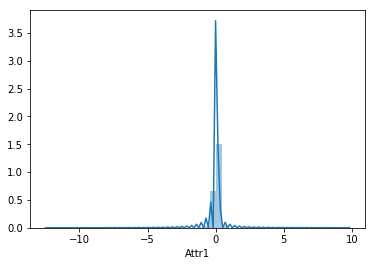

In [45]:
sns.distplot(x1)

In [47]:
print(np.min(x1)); print(np.max(x1))

-12.458
9.8037


[(-3, 3)]

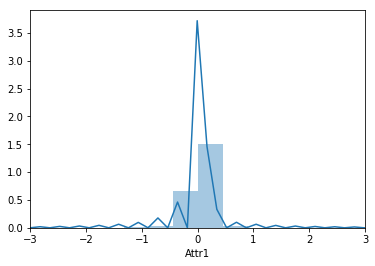

In [62]:
ax = sns.distplot(x1)
ax.set(xlim=(-3, 3))

[(-3, 3)]

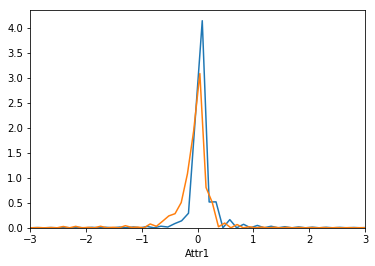

In [70]:
ax2 = sns.distplot(x1[data["class"]==0], hist = False)
ax2 = sns.distplot(x1[data["class"]==1], hist = False)
ax2.set(xlim = (-3, 3))

## X2

In [71]:
x2 = data.iloc[:, 1]
x2.head()

0    0.30051
1    0.00000
2    0.47723
3    0.17679
4    0.27095
Name: Attr2, dtype: float64

In [72]:
np.sum(x2=="?")

0

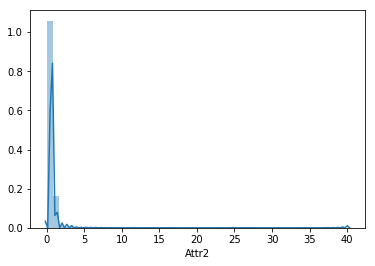

In [80]:
ax = sns.distplot(x2)

[(0, 10)]

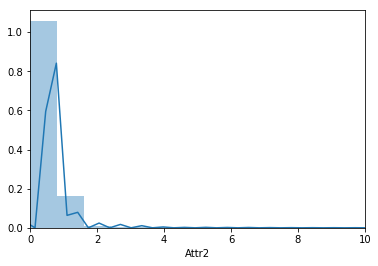

In [82]:
ax = sns.distplot(x2)
ax.set(xlim = (0,10))

log transformation 필요할듯?

[(0, 10)]

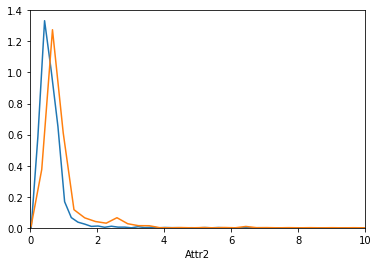

In [84]:
ax2 = sns.distplot(x2[data["class"]==0], hist = False)
ax2 = sns.distplot(x2[data["class"]==1], hist = False)
ax2.set(xlim = (0, 10))

## X3

In [105]:
x = [0]
for i in range(data.shape[1] - 1):
    x.append(data.iloc[:, i])
    
print(len(x))

65


In [109]:
np.sum(x[3]=="?")

0

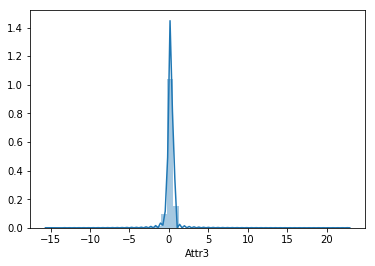

In [110]:
ax = sns.distplot(x[3])

[(-5, 5)]

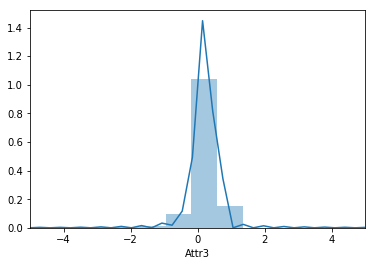

In [112]:
ax = sns.distplot(x[3])
ax.set(xlim = (-5,5))

[(-5, 5)]

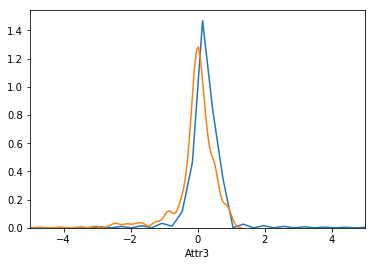

In [113]:
ax2 = sns.distplot(x[3][data["class"]==0], hist = False)
ax2 = sns.distplot(x[3][data["class"]==1], hist = False)
ax2.set(xlim = (-5,5))

## X4

In [114]:
np.sum(x[4]=="?")

28

In [125]:
new_x4 = x[4][x[4] != "?"].astype("float64")
print(len(new_x4))

6827


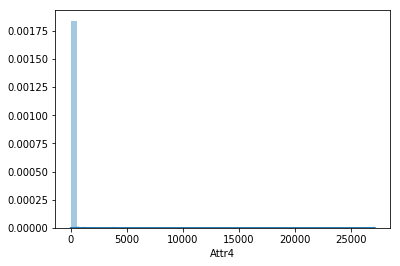

In [126]:
ax = sns.distplot(new_x4)

In [129]:
np.max(new_x4)

27146.0

In [134]:
new_x4.sort_values(ascending=False)

2099    27146.000000
1847     3848.300000
4679     1159.600000
5568      703.970000
2918      610.720000
            ...     
2758        0.023048
5051        0.021061
893         0.016855
5446        0.004717
1207       -0.045319
Name: Attr4, Length: 6827, dtype: float64

outlier일까..? 상당히 크다(27146)

In [140]:
data["class"].iloc[2099]

0

[(0, 10000)]

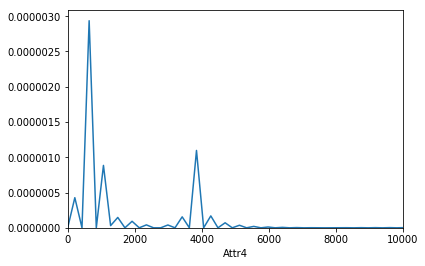

In [146]:
ax = sns.distplot(new_x4, hist=False)
ax.set(xlim = (0, 10000))

아직 무슨 값인진 모르지만 파산은 아니다!

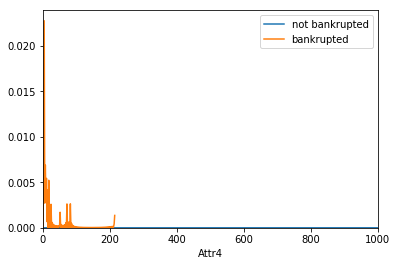

In [149]:
ax2 = sns.distplot(new_x4[data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(new_x4[data["class"]==1], hist = False, label = "bankrupted")
ax2.set(xlim = (0, 1000))
ax2.legend()

이건 뭔가 영향력이 큰 값 일 것같기도!

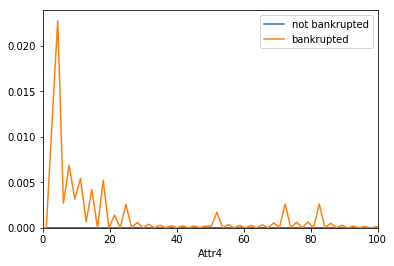

In [150]:
ax2 = sns.distplot(new_x4[data["class"]==0], hist = False, label = "not bankrupted")
ax2 = sns.distplot(new_x4[data["class"]==1], hist = False, label = "bankrupted")
ax2.set(xlim = (0, 100))
ax2.legend()

>100 인 변수 중에서 각각 bankruptcy의 비율을 보자